# NovelD

In [20]:
from model.modules.lnoveld import NovelD

m = NovelD(10, 5, 100)

In [22]:
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

def train(model, batch_size, n_epochs):
    rewards = []
    losses = []
    for n_e in tqdm(range(n_epochs)):
        # Make predictions
        ep_rewards = []
        for b_i in range(batch_size):
            ep_rewards.append(model.get_reward(torch.rand(1, 17)))
        rewards.append(sum(ep_rewards))
        # Train
        losses.append(model.train_predictor())
    # Plot
    plt.plot(rewards)
    plt.plot(losses)

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.03it/s]


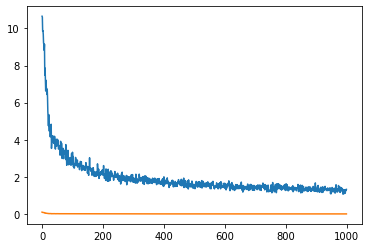

In [17]:
train(m, 32, 1000)

100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 721.98it/s]


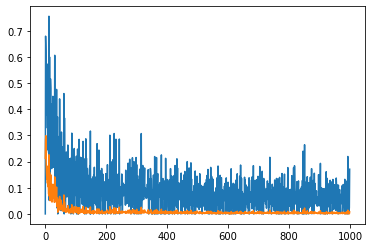

In [19]:
train(m, 1, 1000)

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.76it/s]


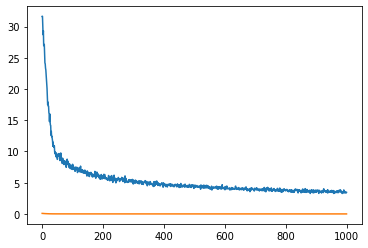

In [21]:
train(m, 100, 1000)

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.67it/s]


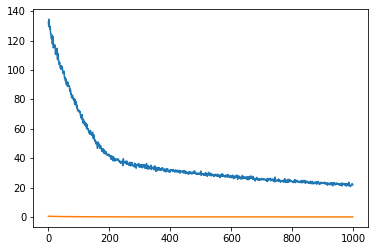

In [23]:
m = NovelD(17, 16, 64)
train(m, 100, 1000)

In [29]:
l = [np.random.rand(10), np.random.rand(10)]
l

[array([0.01332637, 0.86966362, 0.07826922, 0.75580822, 0.09602238,
        0.96651182, 0.04280373, 0.87886587, 0.90380471, 0.11783745]),
 array([0.33701291, 0.17958698, 0.37837657, 0.34447146, 0.28907411,
        0.57755394, 0.08705263, 0.64709855, 0.78802943, 0.27467977])]

In [30]:
np.concatenate(l)

array([0.01332637, 0.86966362, 0.07826922, 0.75580822, 0.09602238,
       0.96651182, 0.04280373, 0.87886587, 0.90380471, 0.11783745,
       0.33701291, 0.17958698, 0.37837657, 0.34447146, 0.28907411,
       0.57755394, 0.08705263, 0.64709855, 0.78802943, 0.27467977])

In [31]:
[1] * 2

[1, 1]

In [13]:
torch.seed()

4821780038691726644

In [36]:
torch.nn.Sequential(None, torch.nn.Linear(10, 10))

Sequential(
  (0): None
  (1): Linear(in_features=10, out_features=10, bias=True)
)

# LNovelD

In [1]:
from model.modules.lnoveld import LNovelD
from model.modules.lm import OneHotEncoder, GRUEncoder

m = LNovelD(17, 16, 12)
word_encoder = OneHotEncoder(vocab = ['Located', 'Object', 'Landmark', 'North', 'South', 'East', 'West', 'Center', 'Not'])
sentence_encoder = GRUEncoder(16, word_encoder)

In [2]:
import json

def load_pairs(data_path):
    with open(data_path, "r") as f:
        data = json.load(f)
    pairs = []
    for step, s_data in data.items():
        if not step.startswith("Step"):
            continue
        pairs.append({
            "observation": s_data["Agent_0"]["Observation"],
            "sentence": s_data["Agent_0"]["Sentence"][1:-1]
        })
        pairs.append({
            "observation": s_data["Agent_1"]["Observation"],
            "sentence": s_data["Agent_1"]["Sentence"][1:-1]
        })
    return pairs

data_pairs = load_pairs("test_data/Sentences_Generated_P1.json")
data_pairs[0]

{'observation': [0.3566717617981794,
  0.22018956073987805,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  -0.4988445287954038,
  -0.25249793046375035],
 'sentence': ['Located', 'East', 'Landmark', 'South', 'West']}

In [15]:
import matplotlib.pyplot as plt
import random
import torch
from tqdm import tqdm

def train(data, model, encoder, batch_size, n_epochs):
    rewards = []
    losses = []
    for n_e in tqdm(range(n_epochs)):
        # Make predictions
        ep_rewards = []
        for b_i in range(batch_size):
            d = random.sample(data, 1)[0]
            obs = torch.Tensor([d["observation"]])
            enc = encoder([d["sentence"]]).view(1, -1)
            ep_rewards.append(model.get_reward(obs, enc))
        rewards.append(sum(ep_rewards))
        # Train
        losses.append(model.train())
    # Plot
    plt.plot(rewards)
    plt.plot(losses)

100%|██████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.26it/s]


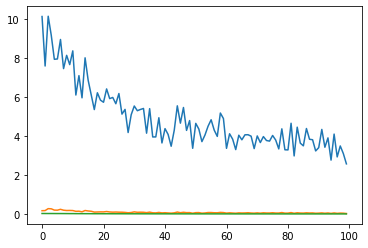

In [16]:
train(data_pairs, m, sentence_encoder, 10, 100)

In [4]:
from model.malnoveld import MALNovelD

m = MALNovelD(17, 5, 16, 2, 
              ['Located', 'Object', 'Landmark', 'I', 'You', 'North', 'South', 'East', 'West', 'Center', 'Not', 'Push', 'Search'],
             0.0007)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [7]:
pol = count_parameters(m.policy.agents[0].policy)
print("pol", pol)
crit = count_parameters(m.policy.agents[0].critic)
print("crit", crit)
print("agent", pol + crit)

pol 5671
crit 7193
crit 7193
agent 12864


In [9]:
obs_enc = count_parameters(m.obs_encoder)
print("obs_enc", obs_enc)
sent_enc = count_parameters(m.sentence_encoder)
print("sent_enc", sent_enc)
dec = count_parameters(m.decoder)
print("dec", dec)
dec = count_parameters(m.decoder)
print("dec", dec)

obs_enc 6386
sent_enc 1856
dec 1839
dec 1839


100%|████████████████████████████████| 20000/20000 [00:00<00:00, 1379886.83it/s]


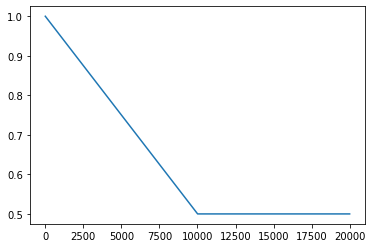

In [1]:
from utils.decay import EpsilonDecay
from tqdm import trange
import matplotlib.pyplot as plt

e = EpsilonDecay(1.0, 0.5, 10000)

exp = []
for i in trange(20000):
    exp.append(e.get_explo_rate(i))
plt.plot(exp)

100%|█████████████████████████████████| 40000/40000 [00:00<00:00, 374785.07it/s]


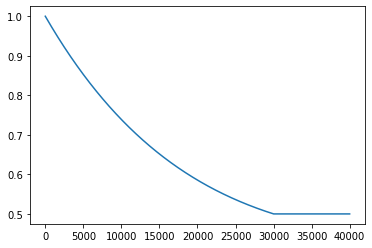

In [6]:
e = EpsilonDecay(1.0, 0.5, 30000, "exp")

exp = []
for i in trange(40000):
    exp.append(e.get_explo_rate(i))
plt.plot(exp)